# Setup

In [1]:
# LOAD PACKAGES
using Pkg

In [2]:
Pkg.add("CSV")
Pkg.add("HTTP")
Pkg.add("StatsKit") # meta-package that loads packages associated with JuliaStats, including DataFrames, GLM, HypothesisTests,
#and MultivariateStats

   Updating registry at `/srv/julia/pkg/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed PooledArrays ──────────────── v0.5.3
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed DataValueInterfaces ───────── v1.0.0
  Installed Tables ────────────────────── v1.2.2
  Installed DataAPI ───────────────────── v1.4.0
  Installed TableTraits ───────────────── v1.0.0
  Installed SentinelArrays ────────────── v1.2.16
  Installed CSV ───────────────────────── v0.8.2
Updating `~/Project.toml`
  [336ed68f] + CSV v0.8.2
Updating `~/Manifest.toml`
  [336ed68f] + CSV v0.8.2
  [9a962f9c] + DataAPI v1.4.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [69de0a69] + Parsers v1.0.15
  [2dfb63ee] + PooledArrays v0.5.3
  [91c51154] + SentinelArrays v1.2.16
  [3783bdb8] + TableTraits v1.0.0
  [bd369af6] + Tables v1.2.2
  [2a0f44e3] + Base64
  [ade2ca70] + Dat

In [5]:
## Open installed packages
using CSV, HTTP, StatsKit

┌ Info: Precompiling StatsKit [2cb19f9e-ec4d-5c53-8573-a4542a68d3f0]
└ @ Base loading.jl:1278


In [6]:
# check julia version
VERSION

v"1.5.3"

# Set Directory Structure

In [13]:
pwd()

"/home/jovyan/code"

In [15]:
path = "/home/jovyan/"
cd(path)
# or cd("..")

In [16]:
pwd()

"/home/jovyan"

## Make Sub-directories

In [20]:
mkdir("./julia")
# if already exist, will print error

LoadError: IOError: mkdir: file already exists (EEXIST)

In [22]:
mkdir("./code")

LoadError: IOError: mkdir: file already exists (EEXIST)

In [23]:
mkdir("./figures")

"./figures"

In [24]:
mkdir("./tables")

"./tables"

In [25]:
readdir()

14-element Array{String,1}:
 ".bash_logout"
 ".bashrc"
 ".cache"
 ".config"
 ".git"
 ".profile"
 "Manifest.toml"
 "Project.toml"
 "README.md"
 "code"
 "data"
 "figures"
 "julia"
 "tables"

# Load Data

In [67]:
# if loading from file in data folder (use CSV and DataFrame together)
df1 = CSV.read("./data/original/metoo_data.csv", DataFrame)

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,1,Democrat,2,Strong Republican,Agree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly
4,4,Republican,1,Independent,Agree somewhat
5,5,Democrat,3,Strong Democrat,Disagree strongly
6,6,Republican,2,Lean Republican,Neither disagree nor agree
7,7,Republican,3,Strong Democrat,Neither disagree nor agree
8,8,Republican,3,Not very strong Republican,Agree strongly
9,9,Democrat,2,Not very strong Democrat,Disagree strongly


In [28]:
row = df1[1,:]

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2
,Int64,String,Int64,String,String,String
1,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly


In [29]:
names!(df1, Symbol.(row))

LoadError: ArgumentError: broadcasting over `DataFrameRow`s is reserved

In [39]:
deleterows!(df2, [1])

,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl,battledeadhigh,lnbdh,pop,lnpop,dper100k,begin,end,duration,lnduration,rate,lnrate,cw,intervention,democ,lngdp,gdpsq,milper,milperpop,lnmilperpop,milex,milqual,lnmilqual,milq2,mountain,lnmountain,ethfrac,lnethfrac,relfrac,lnrelfrac,relpolar,ethnicpolar
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1990,India (Mizoram),750,IND,3,1,900,6.80239,900,6.80239,900,6.80239,487336992,20.0045,0.184677,1966,1968,3,1.09861,300,5.70378,1,0,1,6.62141,12.0995,1220,2.5e-6,-12.8979,1804170,1478.83,7.29901,14.7176,12.9,2.63189,0.886478,-0.120499,0.3384,-1.08353,1,1
2,1500,Argentina 1955,160,ARG,2,0,900,6.80239,900,6.80239,900,6.80239,18574000,16.7373,4.84548,1955,1955,1,0,900,6.80239,1,0,0,8.28702,15.8726,71,3.82e-6,-12.4746,566133,7973.7,8.98391,17.0041,28.4,3.38099,0.307319,-1.17987,0.1512,-1.88915,0,1
3,2770,Romania 1989,360,RUM,5,0,909,6.81234,909,6.81234,909,6.81234,23054000,16.9534,3.94292,1989,1989,1,0,909,6.81234,0,0,0,7.64444,13.6357,220,9.54e-6,-11.5597,809000,3677.27,8.20993,12.8866,17,2.89037,0.252163,-1.37768,0.4704,-0.754172,1,1
4,2970,Croatia 1992-5,344,CRO,5,1,950,6.85646,950,6.85646,950,6.85646,4782300,15.3804,19.8649,1992,1995,4,1.38629,237.5,5.47017,0,0,0,,,103,2.15e-5,-10.7457,561000,5446.6,8.60275,15.5646,3.60925,1.52807,0.334221,-1.09595,0.3828,-0.960243,1,1
5,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.85646,950,6.85646,950,6.85646,5460000,15.513,17.3993,1992,1992,1,0,950,6.85646,0,1,0,8.25019,15.7672,25,4.58e-6,-12.2941,850000,34000,10.4341,20.6803,60.8,4.1239,0.49551,-0.702168,0.5454,-0.606236,1,1
6,1911,Chad 1997-2002,483,CHA,1,0,954,6.86066,954,6.86066,954,6.86066,6937350,15.7524,13.7516,1997,2002,6,1.79176,159,5.0689,0,0,0,5.84192,13.4442,40,5.77e-6,-12.0635,40000,1000,6.90775,15.25,8.5,2.25129,0.826273,-0.19083,0.625,-0.470004,1,1
7,2721,Indonesia (Aceh 1999-2001),850,INS,4,1,980,6.88755,980,6.88755,980,6.88755,203678368,19.132,0.481151,1999,2002,4,1.38629,245,5.50126,0,0,0,7.75563,14.1118,280,1.37e-6,-13.4973,967000,3453.57,8.14716,12.0068,10.5,2.44235,0.764058,-0.269111,0.2216,-1.50688,0,1
8,1180,China (Taiwan 1947),710,SHN,4,1,1000,6.90775,540,6.29157,1000,6.90775,553268992,20.1314,0.180744,1947,1947,1,0,1000,6.90775,1,0,0,5.42054,13.7108,4158,7.52e-6,-11.7986,789300,189.827,5.24611,15.9164,37.4,3.64806,0.118452,-2.13324,0.551,-0.59602,1,0
9,1010,Bolivia (Popular Revolutionary Movement),145,BOL,2,0,1000,6.90775,1000,6.90775,1000,6.90775,2858000,14.8656,34.9895,1946,1946,1,0,1000,6.90775,1,0,0,,,9,3.15e-6,-12.6684,7052,783.556,6.66384,15.4509,35.9,3.60821,0.678133,-0.388412,0.095,-2.35388,0,1


In [46]:
df1[1:5,:]

,id,senator_party,condition,pid7,pre_sexism_1,pre_sexism_2
,Int64,String,Int64,String,String,String
1,1,Democrat,2,Strong Republican,Agree strongly,Disagree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat,Agree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly,Neither disagree nor agree
4,4,Republican,1,Independent,Agree somewhat,Neither disagree nor agree
5,5,Democrat,3,Strong Democrat,Disagree strongly,Disagree strongly


# Summary Statistics

In [30]:
describe(df1)
# or describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


# Data Processing

In [70]:
df1.condition2 = ""

""

In [38]:
describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


In [60]:
df1.condition2 = [x == 1 ? "Jokes" : missing for x in df1.condition]
df1.condition2 = [x == 2 ? "Assault" : df1.condition2 for x in df1.condition]
df1.condition2 = [x == 3 ? "Control" : df1.condition2 for x in df1.condition]

#alt using DataFrames
#transform(df1, :condition2 => (condition -> ifelse.(condition .== 1, "Jokes")) => :condition2)
df1[1:5,:condition]

5-element Array{Int64,1}:
 2
 2
 2
 1
 3

In [73]:
df1[(df1[:condition] .== 1),:condition2]="Jokes"
df1[(df1[:condition] .== 2),:condition2]="Assault"
df1[(df1[:condition] .== 3),:condition2]="Control"

"Control"

In [74]:
df1[1:5,:condition2]

5-element Array{String,1}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"

In [76]:
# make categorical
df1[:condition2] = CategoricalArray(df1[:condition2])

3-element Array{String,1}:
 "Assault"
 "Control"
 "Jokes"

In [78]:
# check levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Control"
 "Jokes"
 "Assault"

In [77]:
# reorder levels
levels!(df1[:condition2], ["Control", "Jokes", "Assault"])

2806-element CategoricalArray{String,1,UInt32}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Jokes"
 "Jokes"
 ⋮
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Assault"
 "Control"
 "Assault"
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Jokes"

In [78]:
# recheck levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Control"
 "Jokes"
 "Assault"

## T-tests

In [80]:
EqualVarianceTTest(df1[:post_favorability], df1[:condition2])

LoadError: MethodError: no method matching EqualVarianceTTest(::Array{Int64,1}, ::CategoricalArray{String,1,UInt32,String,CategoricalValue{String,UInt32},Union{}})
Closest candidates are:
  EqualVarianceTTest(::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /srv/julia/pkg/packages/HypothesisTests/40Llk/src/t.jl:119
  EqualVarianceTTest(::AbstractArray{T,1}, !Matched::AbstractArray{S,1}) where {T<:Real, S<:Real} at /srv/julia/pkg/packages/HypothesisTests/40Llk/src/t.jl:147
  EqualVarianceTTest(::AbstractArray{T,1}, !Matched::AbstractArray{S,1}, !Matched::Real) where {T<:Real, S<:Real} at /srv/julia/pkg/packages/HypothesisTests/40Llk/src/t.jl:147

# Histogram of outcome of interest

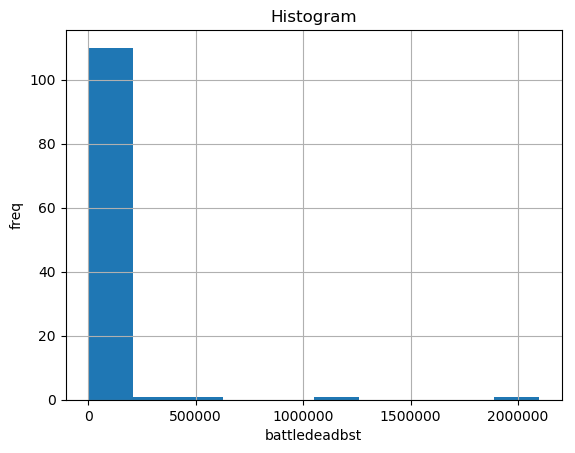

PyObject Text(0.5, 1.0, 'Histogram')

In [42]:
#ioff()
h = plt[:hist](df1[:battledeadbest],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("battledeadbst")
ylabel("freq")
title("Histogram")

#gcf() # Needed for IJulia to plot inline

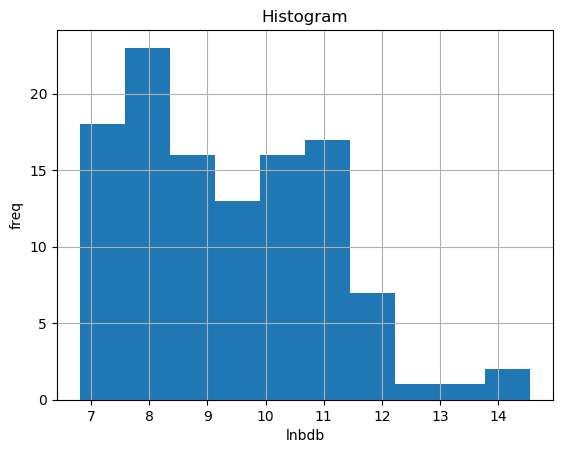

PyObject Text(0.5, 1.0, 'Histogram')

In [43]:
#ioff()
h = plt[:hist](df1[:lnbdb],10) # Histogram, PyPlot.plt required to differentiate with conflicting hist command

grid("on")
xlabel("lnbdb")
ylabel("freq")
title("Histogram")
#gcf()

# Linear Regression

## OLS estimation with StatsModels

In [21]:
# Figure 1
# using StatsModels
m1a = fit(LinearModel, @formula(perchange_favorability ~ condition2), samepartydat)
m1b = fit(LinearModel, @formula(perchange_favorability ~ condition2), opppartydat)

m1a

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: lnbdb ~ 1 + lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)     9.54259   1.97523   4.83113    <1e-5
lnduration     0.807215  0.119085   6.77849    <1e-8
lnpop        -0.0444459 0.0806522 -0.551082   0.5829
lnmilqual      0.100535  0.119599  0.840602   0.4027
lngdp         -0.190762  0.175242  -1.08857   0.2791
cw             0.666635  0.313273   2.12797   0.0359
lnmountain     0.101181  0.119736  0.845036   0.4002
democ         -0.870604  0.357806  -2.43317   0.0168
ethnicpolar   -0.980459  0.338806  -2.89386   0.0047
relpolar       0.118726  0.323089  0.367471   0.7141


In [22]:
m1b

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: lnbdb ~ 1 + lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar

Coefficients:
               Estimate Std.Error   t value Pr(>|t|)
(Intercept)     9.54259   1.97523   4.83113    <1e-5
lnduration     0.807215  0.119085   6.77849    <1e-8
lnpop        -0.0444459 0.0806522 -0.551082   0.5829
lnmilqual      0.100535  0.119599  0.840602   0.4027
lngdp         -0.190762  0.175242  -1.08857   0.2791
cw             0.666635  0.313273   2.12797   0.0359
lnmountain     0.101181  0.119736  0.845036   0.4002
democ         -0.870604  0.357806  -2.43317   0.0168
ethnicpolar   -0.980459  0.338806  -2.89386   0.0047
relpolar       0.118726  0.323089  0.367471   0.7141


In [23]:
# diagnostics

In [52]:
Pkg.add("StatPlots")
Pkg.add("Plots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [53]:
using StatPlots, Plots

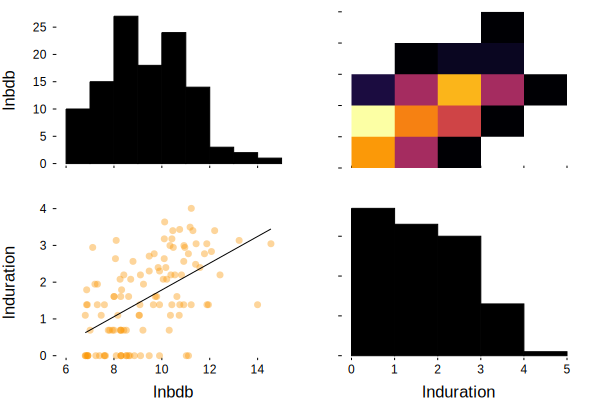

In [55]:
@df df2 corrplot([:lnbdb :lnduration], grid = false)